In [ ]:
!pip install mne;
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [ ]:
def readdotmatdata(filename_mat):

  """
  Returns 
      arrays:
          times, [1 x samples]
          data,  [channels x samples x trials]
          fs, [1 x 1] 
      list
          labels [ channels x 1]

  """
  
  EEG = loadmat('sampleEEGdata.mat')

  # extract the necessary information
  times = np.squeeze(EEG['EEG'][0][0][14])
  data  = EEG['EEG'][0][0][15]
  fs    = EEG['EEG'][0][0][11][0][0].astype(int) # sampling rate

  labels = []
  for i in range(64):
    labels.append(EEG['EEG'][0][0][21][0][i][0][0])

  return times, data, fs, labels


In [ ]:
# import the data to python
from scipy.io import loadmat
times, data, fs, labels = readdotmatdata('sampleEEGdata.mat')
print('data loaded correctly')


data loaded correctly


# Task 1

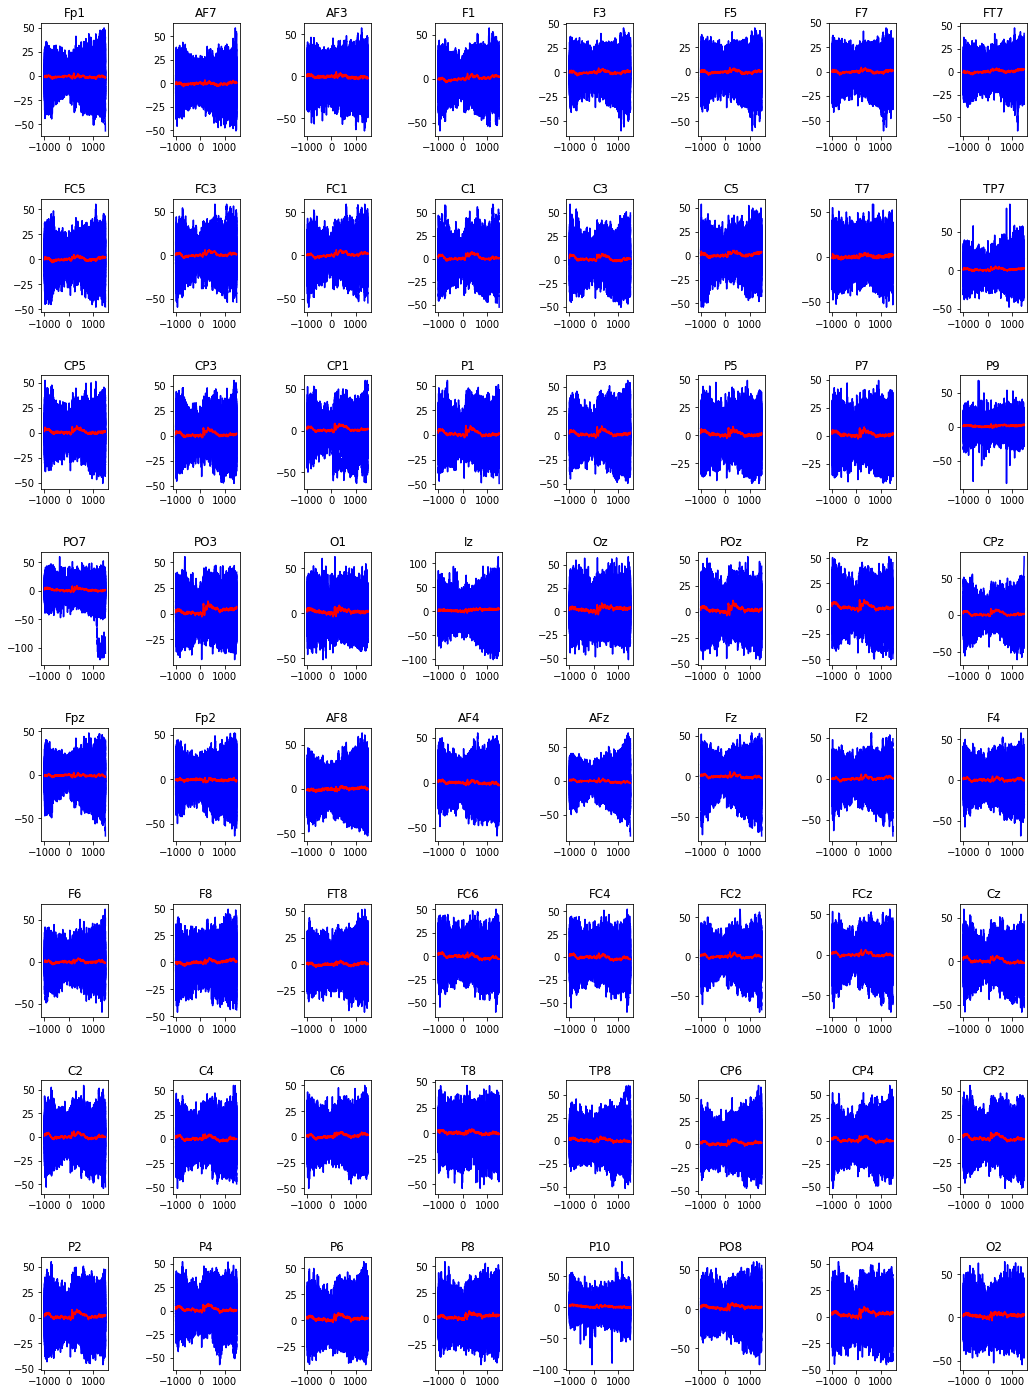

In [ ]:
# ERP plot: Figure 9.1b 

# compute ERP
fig, ax = plt.subplots(8, 8, figsize = (15,20))

for idx, i in enumerate(ax.flatten()):
    erp = np.mean(data,axis=2)[idx,:]
    # plot trial-averaged response
    i.plot(times, np.squeeze(data[[idx],:,:],axis=0),'b')
    i.plot(times,erp.T,'r')
    i.set_title(labels[idx])
fig.tight_layout(pad=3.0)

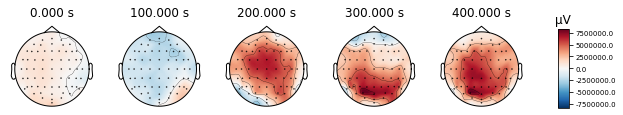

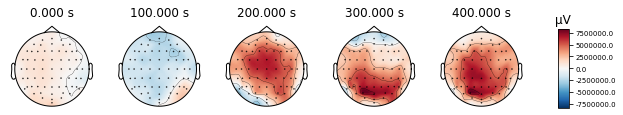

In [ ]:
import mne

biosemi_montage = mne.channels.make_standard_montage('biosemi64')
n_channels = len(biosemi_montage.ch_names)
fake_info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=250.,
                            ch_types='eeg')

rng = np.random.RandomState(0)
data_fake = rng.normal(size=(n_channels, 1)) * 1e-6

data_mne = mne.EvokedArray(np.mean(data,axis=2), fake_info)
data_mne.times = times
data_mne.data = np.mean(data,axis=2)
data_mne.set_montage(biosemi_montage)

times2plot = np.arange(0, 401,100)
times2plot

data_mne.plot_topomap(times2plot, ch_type='eeg', time_unit='s')

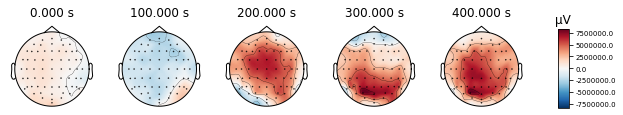

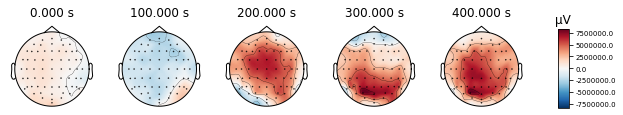

In [ ]:
data_mne.plot_topomap(times2plot, ch_type='eeg', time_unit='s', average=0.04) #20 ms before and 20 ms

# Task 2

In [ ]:
mask = (times < 400) & (times > 200)
times_masked = times[mask]
data_masked = data[:, mask, :]

np.sum(mask), times_masked.shape, data_masked.shape

(51, (51,), (64, 51, 99))

In [ ]:
times_masked

array([203.125  , 207.03125, 210.9375 , 214.84375, 218.75   , 222.65625,
       226.5625 , 230.46875, 234.375  , 238.28125, 242.1875 , 246.09375,
       250.     , 253.90625, 257.8125 , 261.71875, 265.625  , 269.53125,
       273.4375 , 277.34375, 281.25   , 285.15625, 289.0625 , 292.96875,
       296.875  , 300.78125, 304.6875 , 308.59375, 312.5    , 316.40625,
       320.3125 , 324.21875, 328.125  , 332.03125, 335.9375 , 339.84375,
       343.75   , 347.65625, 351.5625 , 355.46875, 359.375  , 363.28125,
       367.1875 , 371.09375, 375.     , 378.90625, 382.8125 , 386.71875,
       390.625  , 394.53125, 398.4375 ])

In [ ]:
erp_max_indexes = np.mean(data_masked,axis=2).argmax(axis=1)
erp_max_indexes

array([ 0,  0, 42, 42,  0,  0,  0, 42,  0, 42, 42, 42, 30, 30, 32, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 30, 30, 30, 42,  0, 42,
       45, 42,  0,  0,  0,  0, 42, 42, 42,  0,  0,  0,  0, 42,  0,  0, 42,
       42, 17, 42, 42, 42, 30, 30, 17, 17, 17, 23, 30, 30])

In [ ]:
erp_max_indexes.shape

(64,)

In [ ]:
erp_max_indexes

array([ 0,  0, 42, 42,  0,  0,  0, 42,  0, 42, 42, 42, 30, 30, 32, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 30, 30, 30, 42,  0, 42,
       45, 42,  0,  0,  0,  0, 42, 42, 42,  0,  0,  0,  0, 42,  0,  0, 42,
       42, 17, 42, 42, 42, 30, 30, 17, 17, 17, 23, 30, 30])

In [ ]:
times2plot = times_masked[np.unique(erp_max_indexes)]

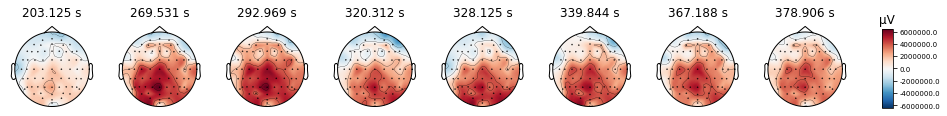

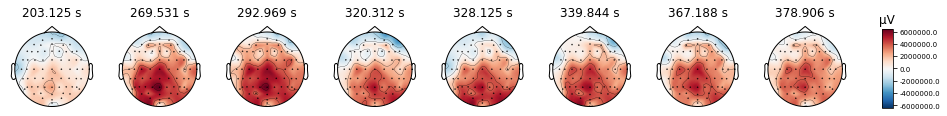

In [ ]:
data_mne = mne.EvokedArray(np.mean(data_masked,axis=2), fake_info)
data_mne.times = times_masked
data_mne.data = np.mean(data,axis=2)
data_mne.set_montage(biosemi_montage)

data_mne.plot_topomap(times2plot, ch_type='eeg', time_unit='s')

In [ ]:
# For each timestamp within the interval discover the channel with maximal erp
# at this time point. We will take the first and the last timepoint from 
# the timestamps above
channel_idxs = np.mean(data_masked,axis=2
                      ).argmax(axis=0)[np.unique(erp_max_indexes)][[0, -1]]
label_names = np.array(labels)[channel_idxs]
channel_idxs, label_names

(array([46, 25]), array(['FCz', 'PO3'], dtype='<U3'))

# Task 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

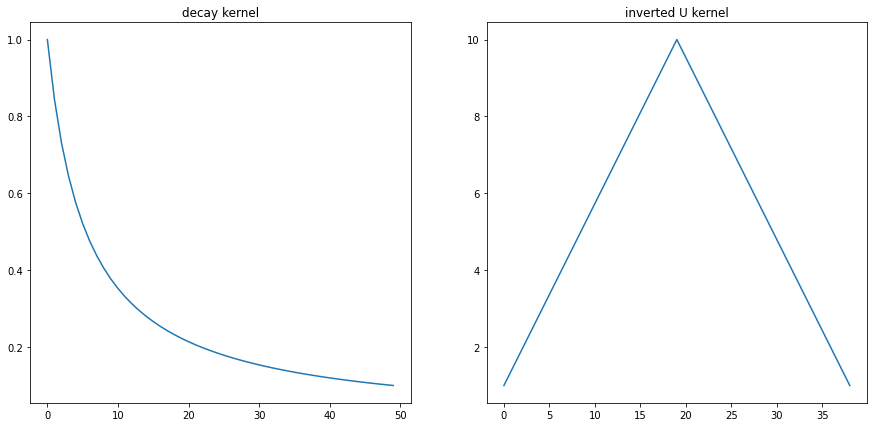

In [ ]:
x = np.linspace(1, 10) 

decay_kernel = 1 / x

a = np.linspace(1, 10, 20)
u_kernel = np.concatenate((a, np.flip(a)[1:]))

fig, ax = plt.subplots(1, 2,figsize=(15, 7))

ax[0].plot(decay_kernel);
ax[1].plot(u_kernel);

ax[0].set_title('decay kernel');
ax[1].set_title('inverted U kernel');

# Task 4

In [ ]:
data2convolve = np.mean(data,axis=2)[0,:][50:100]
data2convolve

array([ 0.17509998, -0.08251736, -0.22833252, -0.18806899,  0.46485218,
       -0.03130568,  0.13787116, -0.5315078 , -1.001298  , -0.58863825,
       -0.92647   , -0.2506405 , -0.64909184, -1.5748016 , -1.1554899 ,
       -0.31829977, -0.97211987, -0.6438345 , -1.6587263 , -1.2147127 ,
       -1.5605805 , -1.4017698 , -1.8166416 , -1.6427798 , -1.9400188 ,
       -2.270498  , -2.4131925 , -2.450863  , -2.2725835 , -2.0671782 ,
       -1.4180751 , -2.3489304 , -3.29299   , -2.2388968 , -2.355683  ,
       -2.2320013 , -1.9669539 , -1.3033361 , -1.8595288 , -2.3282053 ,
       -0.8042518 , -1.2623886 , -1.467927  , -2.2259464 , -1.6645617 ,
       -1.9555266 , -2.2059639 , -1.4943411 , -2.6845696 , -1.0023975 ],
      dtype=float32)

In [ ]:
py_conv_result_u = np.convolve(data2convolve, u_kernel,'same')
py_conv_result_decay = np.convolve(data2convolve, decay_kernel,'same')

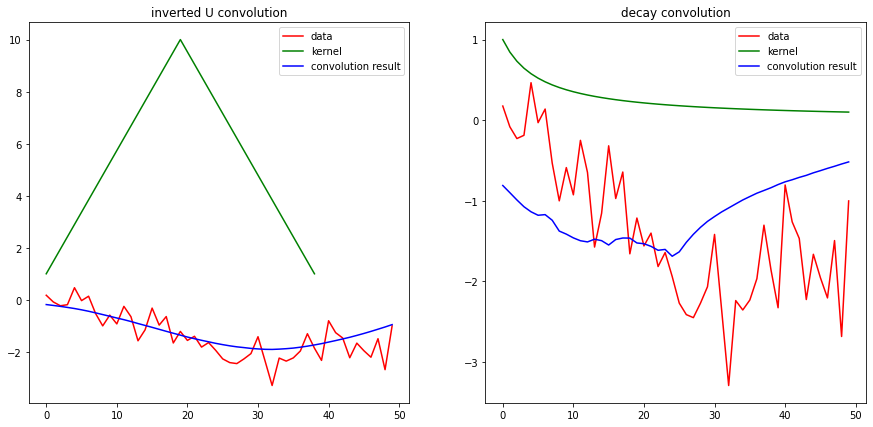

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(15, 7))

ax[0].plot(data2convolve, 'r', label='data');
ax[0].plot(u_kernel, 'g', label='kernel');
ax[0].plot(py_conv_result_u/sum(u_kernel) ,'-b', label='convolution result') ;
ax[0].set_title('inverted U convolution');
ax[0].legend();

ax[1].plot(data2convolve, 'r', label='data');
ax[1].plot(decay_kernel, 'g', label='kernel');
ax[1].plot(py_conv_result_decay/sum(decay_kernel) ,'-b', label='convolution result') ;
ax[1].set_title('decay convolution');
ax[1].legend();

Visually, convolution operation combine two functions into one function.
Considering the EEG signal, "inverted U"-like convolution makes signal smoother, while "decay"-like convolution shows the direction of function growth or decay